In [1]:
import json
import matplotlib.pyplot as plt
import copy
import numpy as np

In [2]:
folders_with_sharing_base = ["with-sharing-base-1", "with-sharing-base-2", "with-sharing-base"]
folders_without_sharing_base = ["without-sharing-base-1", "without-sharing-base-2", "without-sharing-base"]
folders_traditional_fl = ["round-1", "round-2", "round-3"]

In [3]:
data_structure = {
  "rnd": 0,
  "global_loss": 0,
  "global_accuracy": 0,
  "user_loss": 0,
  "user_accuracy": 0,
  "device_weighted_accuracy": 0,
  "device_weighted_accuracy_var": 0,
  "device_accuracies": [],
  "total_loss": 0
  }

In [4]:
with_sharing_base = []
without_sharing_base = []
traditional_fl = []

In [5]:
for round in range(1, 11):
    data = copy.deepcopy(data_structure)
    try_1 = f'./../results/{folders_with_sharing_base[0]}/{round}.json'
    try_2 = f'./../results/{folders_with_sharing_base[1]}/{round}.json'
    try_3 = f'./../results/{folders_with_sharing_base[2]}/{round}.json'

    try_1_data = json.load(open(try_1))
    try_2_data = json.load(open(try_2))
    try_3_data = json.load(open(try_3))

    data['rnd'] = try_1_data['rnd']
    data['global_loss'] = np.mean([try_1_data['global_loss'], try_2_data['global_loss'], try_3_data['global_loss']])
    data['global_accuracy'] = np.mean([try_1_data['global_accuracy'], try_2_data['global_accuracy'], try_3_data['global_accuracy']])
    data['user_loss'] = np.mean([try_1_data['user_loss'], try_2_data['user_loss'], try_3_data['user_loss']])
    data['user_accuracy'] = np.mean([try_1_data['user_accuracy'], try_2_data['user_accuracy'], try_3_data['user_accuracy']])
    data['total_loss'] = np.mean([try_1_data['total_loss'], try_2_data['total_loss'], try_3_data['total_loss']])

    data['device_accuracies'] = []

    for i in range(len(try_1_data['device_accuracies'])):
        data['device_accuracies'].append(np.mean([try_1_data['device_accuracies'][i], try_2_data['device_accuracies'][i], try_3_data['device_accuracies'][i]]))


    with_sharing_base.append(data)

In [6]:
for round in range(1, 11):
    data = copy.deepcopy(data_structure)
    try_1 = f'./../results/{folders_without_sharing_base[0]}/{round}.json'
    try_2 = f'./../results/{folders_without_sharing_base[1]}/{round}.json'
    try_3 = f'./../results/{folders_without_sharing_base[2]}/{round}.json'

    try_1_data = json.load(open(try_1))
    try_2_data = json.load(open(try_2))
    try_3_data = json.load(open(try_3))

    data['rnd'] = try_1_data['rnd']
    data['global_loss'] = np.mean([try_1_data['global_loss'], try_2_data['global_loss'], try_3_data['global_loss']])
    data['global_accuracy'] = np.mean([try_1_data['global_accuracy'], try_2_data['global_accuracy'], try_3_data['global_accuracy']])
    data['user_loss'] = np.mean([try_1_data['user_loss'], try_2_data['user_loss'], try_3_data['user_loss']])
    data['user_accuracy'] = np.mean([try_1_data['user_accuracy'], try_2_data['user_accuracy'], try_3_data['user_accuracy']])
    data['total_loss'] = np.mean([try_1_data['total_loss'], try_2_data['total_loss'], try_3_data['total_loss']])

    data['device_accuracies'] = []

    for i in range(len(try_1_data['device_accuracies'])):
        data['device_accuracies'].append(np.mean([try_1_data['device_accuracies'][i], try_2_data['device_accuracies'][i], try_3_data['device_accuracies'][i]]))


    without_sharing_base.append(data)

In [7]:
for round in range(0, 10):
    data = {
        'rnd': 0,
        'loss': 0,
        'accuracy': 0
    }

    try_1 = f'./../without-model-sharing/results/{folders_traditional_fl[0]}/{round}.json'
    try_2 = f'./../without-model-sharing/results/{folders_traditional_fl[1]}/{round}.json'
    try_3 = f'./../without-model-sharing/results/{folders_traditional_fl[2]}/{round}.json'

    try_1_data = json.load(open(try_1))
    try_2_data = json.load(open(try_2))
    try_3_data = json.load(open(try_3))

    data['rnd'] = round + 1
    data['global_loss'] = np.mean([try_1_data['loss'], try_2_data['loss'], try_3_data['loss']])
    data['global_accuracy'] = np.mean([try_1_data['accuracy'], try_2_data['accuracy'], try_3_data['accuracy']])

    traditional_fl.append(data)

Global Loss and accuracy - Without sharing personal model from init

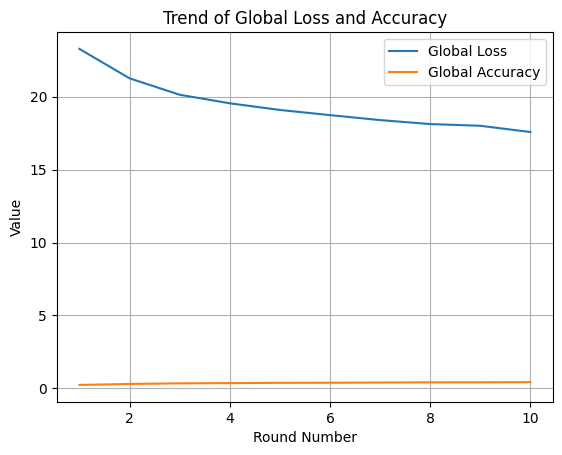

In [8]:
round_numbers = [data["rnd"] for data in without_sharing_base]
global_loss_values = [data["global_loss"] for data in without_sharing_base]
global_accuracy_values = [data["global_accuracy"] for data in without_sharing_base]

plt.plot(round_numbers, global_loss_values, label="Global Loss")
plt.plot(round_numbers, global_accuracy_values, label="Global Accuracy")

plt.xlabel("Round Number")
plt.ylabel("Value")
plt.title("Trend of Global Loss and Accuracy")
plt.legend()

plt.grid(True)
plt.show()

Global Loss and accuracy - With sharing personal model from init

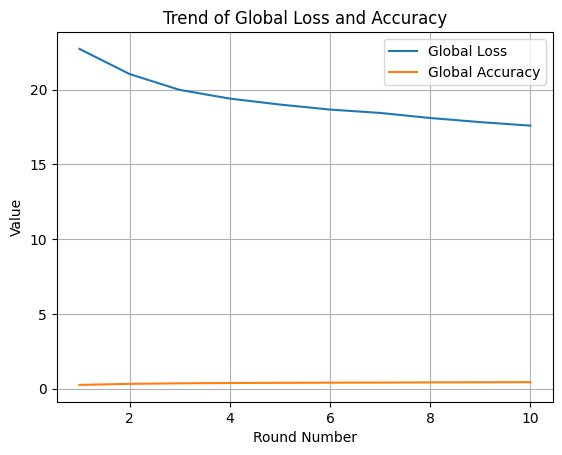

In [9]:
round_numbers = [data["rnd"] for data in with_sharing_base]
global_loss_values = [data["global_loss"] for data in with_sharing_base]
global_accuracy_values = [data["global_accuracy"] for data in with_sharing_base]

plt.plot(round_numbers, global_loss_values, label="Global Loss")
plt.plot(round_numbers, global_accuracy_values, label="Global Accuracy")

plt.xlabel("Round Number")
plt.ylabel("Value")
plt.title("Trend of Global Loss and Accuracy")
plt.legend()

plt.grid(True)
plt.show()

Global Loss and accuracy - With traditiotal FL

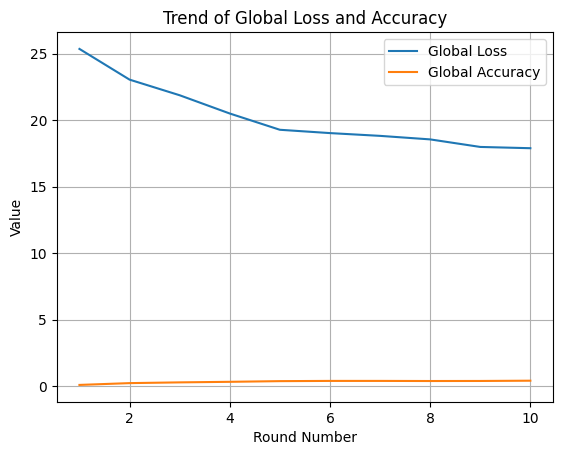

In [10]:
round_numbers = [data["rnd"] for data in traditional_fl]
global_loss_values = [data["global_loss"] for data in traditional_fl]
global_accuracy_values = [data["global_accuracy"] for data in traditional_fl]

plt.plot(round_numbers, global_loss_values, label="Global Loss")
plt.plot(round_numbers, global_accuracy_values, label="Global Accuracy")

plt.xlabel("Round Number")
plt.ylabel("Value")
plt.title("Trend of Global Loss and Accuracy")
plt.legend()

plt.grid(True)
plt.show()

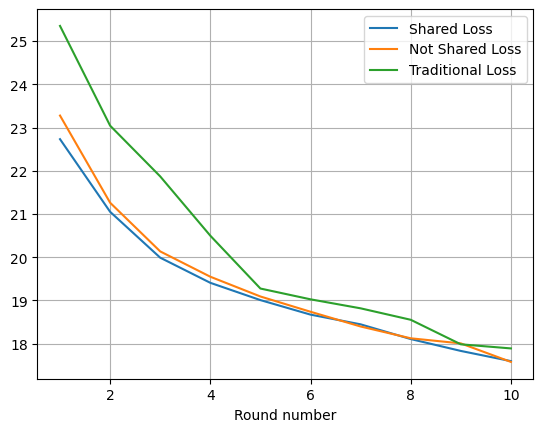

In [11]:
round_numbers = [data["rnd"] for data in traditional_fl]
with_sharing_loss = [data["global_loss"] for data in with_sharing_base]
without_sharing_loss = [data["global_loss"] for data in without_sharing_base]
traditional_loss = [data["global_loss"] for data in traditional_fl]

plt.plot(round_numbers, with_sharing_loss, label="Shared Loss")
plt.plot(round_numbers, without_sharing_loss, label="Not Shared Loss")
plt.plot(round_numbers, traditional_loss, label="Traditional Loss")

plt.xlabel('Round number')
plt.legend()

plt.grid(True)
plt.show()

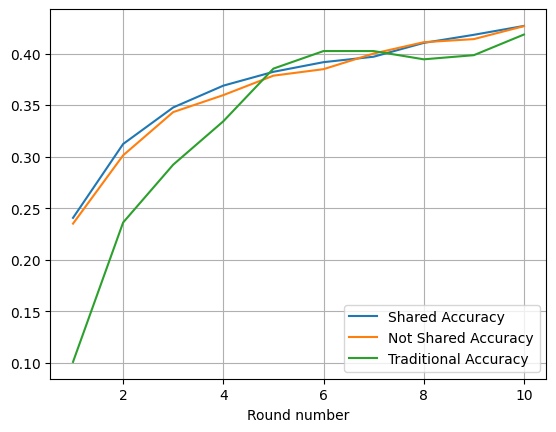

In [12]:
round_numbers = [data["rnd"] for data in traditional_fl]
with_sharing_accuracy = [data["global_accuracy"] for data in with_sharing_base]
without_sharing_accuracy = [data["global_accuracy"] for data in without_sharing_base]
traditional_accuracy = [data["global_accuracy"] for data in traditional_fl]

plt.plot(round_numbers, with_sharing_accuracy, label="Shared Accuracy")
plt.plot(round_numbers, without_sharing_accuracy, label="Not Shared Accuracy")
plt.plot(round_numbers, traditional_accuracy, label="Traditional Accuracy")

plt.xlabel('Round number')
plt.legend()

plt.grid(True)
plt.show()